<a href="https://colab.research.google.com/github/dsarj/tcc_previsao_pulsares/blob/main/pulse_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from google.colab import files

In [19]:
# Caminho do arquivo a ser lido
data = files.upload()

# Armazenando o conteudo do arquivo lido na variável data
# train_data = pd.read_csv(file_path)

Saving pulsar_data_train.csv to pulsar_data_train (1).csv


In [20]:
#Exibindo dimensões campos e tipos de dados
pulse_star_train = pd.read_csv(next(iter(data.keys())))

print("\nDimensões de Pulse Star:\n{0}\n".format(pulse_star_train.shape))
print("\nCampos de Pulse Star:\n{0}\n".format(list(pulse_star_train .keys())))
print("\nTipos dos dados:\n{0}\n".format(pulse_star_train .dtypes))

# Printando estatísticas iniciais em tabela bruta
pulse_star_train.describe()


Dimensões de Pulse Star:
(12528, 9)


Campos de Pulse Star:
[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


Tipos dos dados:
 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object



,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [21]:
# Obtendo primeiros dados da tabela
pulse_star_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
''' Explicando as colunas
Mean of the Integrated profile:
Standard deviation: 
'''

In [22]:
pulse_star_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [23]:
# Somando todos os valores NULL
pulse_star_train.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [25]:
# Printando o nome das colunas do dataset atual
print('Nomes das colunas atualmente no dataset: ', pulse_star_train.columns)

Nomes das colunas atualmente no dataset:  Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


In [28]:
# Renomeando colunas para uso posterior; Vou atribuir o dataframe com as colunas renomeadas a uma nova variável;
ps_train = pulse_star_train.rename(columns={' Mean of the integrated profile': 'mean_integrated_profile', 
                                            ' Standard deviation of the integrated profile': 'std_deviation_integrated_profile', 
                                            ' Excess kurtosis of the integrated profile':'excess_kurtosis_integrated_profile',
                                            ' Skewness of the integrated profile':'skewness_integrated_profile', 
                                            ' Mean of the DM-SNR curve':'mean_dmsnr_curve', 
                                            ' Standard deviation of the DM-SNR curve':'std_deviation_dmsnr_curve',
                                            ' Excess kurtosis of the DM-SNR curve':'excess_kurtosis_dmsnr_curve', 
                                            ' Skewness of the DM-SNR curve':'skewness_dmsnr_curve', 
                                            ' target_class':'is_pulse_star'})


In [29]:
# Colunas com novos nomes
ps_train.columns

Index(['mean_integrated_profile', 'std_deviation_integrated_profile',
       'excess_kurtosis_integrated_profile', 'skewness_integrated_profile',
       'mean_dmsnr_curve', 'std_deviation_dmsnr_curve',
       'excess_kurtosis_dmsnr_curve', 'skewness_dmsnr_curve', 'target_class'],
      dtype='object')

In [30]:
# Verificando valores faltantes nas colunas
ps_train.isna().sum()

mean_integrated_profile                  0
std_deviation_integrated_profile         0
excess_kurtosis_integrated_profile    1735
skewness_integrated_profile              0
mean_dmsnr_curve                         0
std_deviation_dmsnr_curve             1178
excess_kurtosis_dmsnr_curve              0
skewness_dmsnr_curve                   625
target_class                             0
dtype: int64


Analisando o atributo excess_kurtosis_integrated_profile:
count    10793.000000
mean         0.478548
std          1.064708
min         -1.738021
25%          0.024652
50%          0.223678
75%          0.473125
max          8.069522
Name: excess_kurtosis_integrated_profile, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f25a8090>]],
      dtype=object)

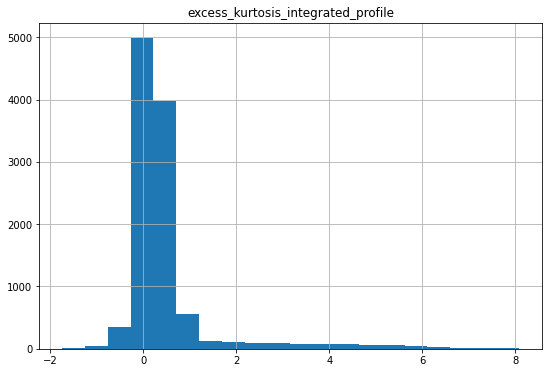

In [36]:
# Três colunas possuem valores faltantes:
# excess_kurtosis_integrated_profile
# std_deviation_dmsnr_curve 
# skewness_dmsnr_curve

# Analisando a coluna excess_kurtosis_integrated_profile
print("\nAnalisando o atributo excess_kurtosis_integrated_profile:")
print(ps_train["excess_kurtosis_integrated_profile"].describe())
ps_train.hist(column='excess_kurtosis_integrated_profile',
                   figsize=(9,6),
                   bins=20)


count    12528.000000
mean         0.443251
std          0.992144
min         -1.738021
25%          0.057820
50%          0.223678
75%          0.421239
max          8.069522
Name: excess_kurtosis_integrated_profile, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f1c9c2d0>]],
      dtype=object)

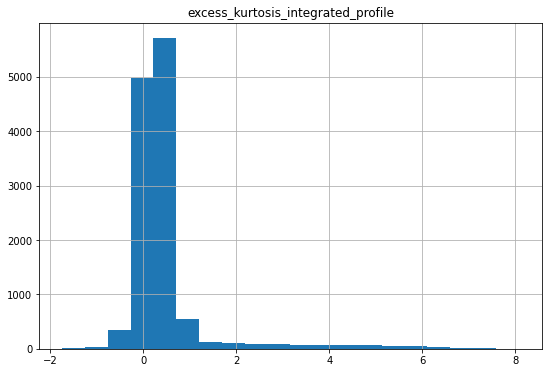

In [65]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["excess_kurtosis_integrated_profile"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["excess_kurtosis_integrated_profile"].isnull(),
                   mediana,                      
                   ps_train["excess_kurtosis_integrated_profile"])
ps_train["excess_kurtosis_integrated_profile"] = novo_valor

print(ps_train["excess_kurtosis_integrated_profile"].describe())
ps_train.hist(column='excess_kurtosis_integrated_profile',
                   figsize=(9,6),
                   bins=20)


count    11350.000000
mean        26.351318
std         19.610842
min          7.370432
25%         14.404353
50%         18.412402
75%         28.337418
max        110.642211
Name: std_deviation_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f1f5f8d0>]],
      dtype=object)

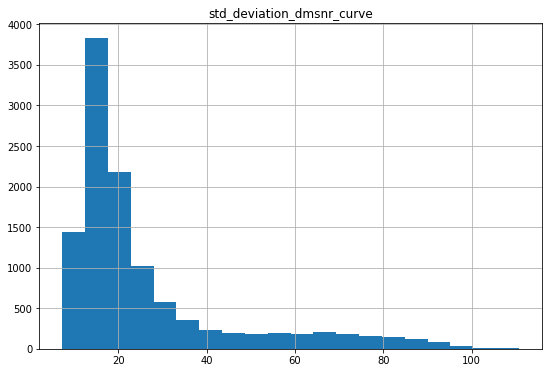

In [63]:
# Analisando a coluna std_deviation_dmsnr_curve
print("\nAnalisando o atributo std_deviation_dmsnr_curve:")
print(ps_train["std_deviation_dmsnr_curve"].describe())
ps_train.hist(column='std_deviation_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)

count    12528.000000
mean        25.604827
std         18.809291
min          7.370432
25%         14.761144
50%         18.412402
75%         26.473142
max        110.642211
Name: std_deviation_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f1c9e050>]],
      dtype=object)

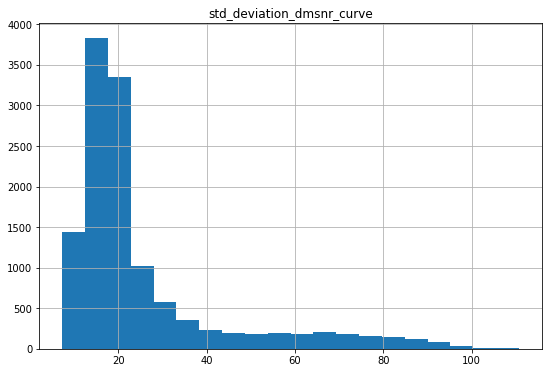

In [66]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["std_deviation_dmsnr_curve"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["std_deviation_dmsnr_curve"].isnull(),
                   mediana,                      
                   ps_train["std_deviation_dmsnr_curve"])
ps_train["std_deviation_dmsnr_curve"] = novo_valor

print(ps_train["std_deviation_dmsnr_curve"].describe())
ps_train.hist(column='std_deviation_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)


Analisando o atributo skewness_dmsnr_curve:
count    11903.000000
mean       105.525779
std        107.399585
min         -1.976976
25%         35.199899
50%         83.126301
75%        139.997850
max       1191.000837
Name: skewness_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f22495d0>]],
      dtype=object)

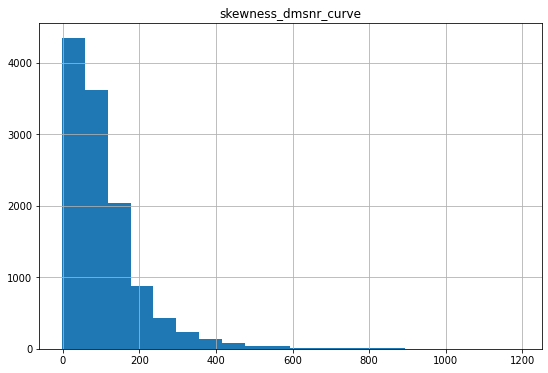

In [64]:
# Analisando a coluna skewness_dmsnr_curve
print("\nAnalisando o atributo skewness_dmsnr_curve:")
print(ps_train["skewness_dmsnr_curve"].describe())
ps_train.hist(column='skewness_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)

count    12528.000000
mean       104.408308
std        104.799639
min         -1.976976
25%         38.128424
50%         83.126301
75%        135.774973
max       1191.000837
Name: skewness_dmsnr_curve, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8f24b7fd0>]],
      dtype=object)

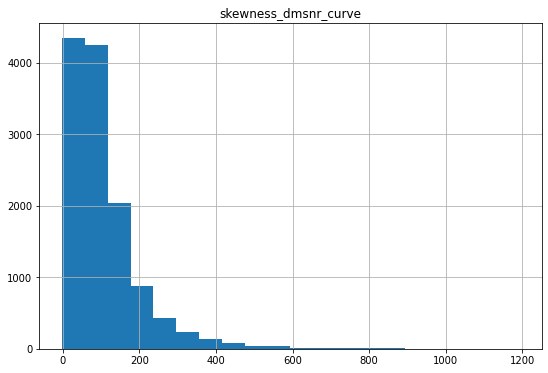

In [67]:
# Preenchendo os valores faltantes da coluna com a mediana
mediana = np.median([el for el in ps_train["skewness_dmsnr_curve"] if (np.isnan(el) == False)])

novo_valor = np.where(ps_train["skewness_dmsnr_curve"].isnull(),
                   mediana,                      
                   ps_train["skewness_dmsnr_curve"])
ps_train["skewness_dmsnr_curve"] = novo_valor

print(ps_train["skewness_dmsnr_curve"].describe())
ps_train.hist(column='skewness_dmsnr_curve',
                   figsize=(9,6),
                   bins=20)